In [2]:
import os #파일폴더경로등의 정보를 가져오기 위해서 사용
import re #Regular Expression을 구현하기 위함
import pandas as pd #데이터구조화
import tensorflow as tf #텐서플로우를 나중에 쓸꺼니까
from tensorflow.keras import utils # 인터넷을 통해 외부자료 다운받는 함수쓸꺼니까
data_set = tf.keras.utils.get_file(
fname = "imdb.tar.gz", # 다운로드하는 파일의 이름
origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
extract = True
)

In [ ]:
data_set

In [4]:
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)

In [5]:
def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df])

In [8]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))
train_df.head()

,review,sentiment
0,Claire Denis's Chocolat is a beautiful but fru...,1
1,"""Thieves and Liars"" presents us with a very na...",1
2,"Jess is 18, very smart and wants nothing more ...",1
3,The film is exceptional in it's gay iconograph...,1
4,I spotted this movie in the video store a few ...,1


In [13]:
reviews = list(train_df['review'])
print(reviews[0])

tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[0])
print(tokenized_reviews[1])
len_review_by_words = [len(t) for t in tokenized_reviews]
print(len_review_by_words[0])
print(len_review_by_words[1])
len_review_by_alphabet = [len(s.replace(' ', '')) for s in reviews]
print(len_review_by_alphabet[0])
print(len_review_by_alphabet[1])

Claire Denis's Chocolat is a beautiful but frustrating film. The film presents a very interesting look at the household of a European colonial family living in Cameroon, giving the viewer an informative perspective on the lives of many characters and their interaction. However, the development of these characters is often maddeningly insufficient. For example, a central theme in the story is young France's inability to form strong relationships with others. Although this portrayal is executed flawlessly, notably in the way that Denis frames the story with scenes from France's return to her childhood home, the girl's lack of intimacy with the film's other characters makes it difficult for a viewer to invest much interest in her development (or lack thereof) as a protagonist. The general stagnation of the film's character development makes it difficult to become engaged in the loosely organized plot. The film raises a great deal of tension between characters, particularly between Aimee a

Text(0, 0.5, 'Number of Reviews')

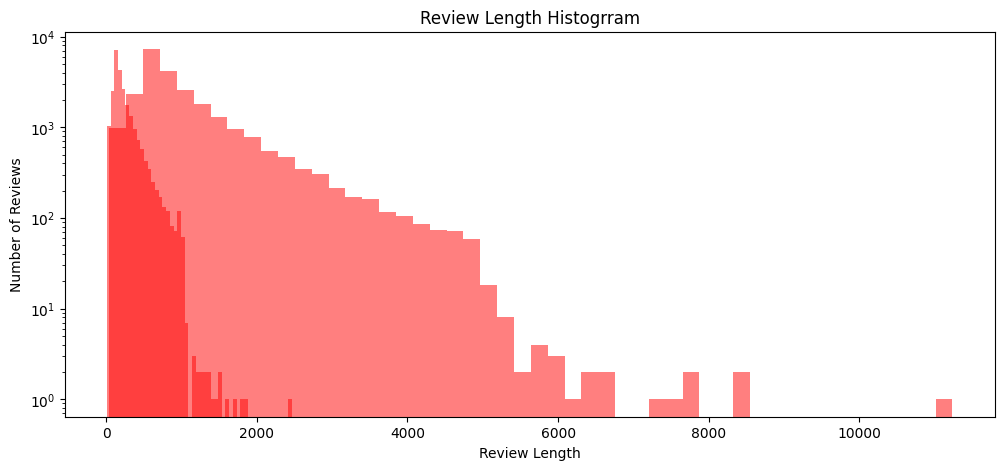

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.hist(len_review_by_words, bins = 50, alpha = 0.5, color = 'r')
plt.hist(len_review_by_alphabet, bins = 50, alpha = 0.5, color = 'r')
plt.yscale('log', nonpositive = 'clip')
plt.title("Review Length Histogrram")
plt.xlabel("Review Length")
plt.ylabel("Number of Reviews")

In [17]:
import numpy as np
print("최대 단어수를 가지는 문장은 몇개의 단어인가?", np.max(len_review_by_words))
print("최소 단어수를 가지는 문장은 몇개의 단어인가?", np.min(len_review_by_words))
print("평균적으로 몇개의 단어를 가지는가?", np.mean(len_review_by_words))
print("문장의 단어수들의 중간값은 얼마인가?", np.median(len_review_by_words))
print("문장에 있는 단어들의 표준편차는 얼마인가?", np.std(len_review_by_words))
print("문장의 하우 10% 길이는 얼마인가?", np.percentile(len_review_by_words, 10))


최대 단어수를 가지는 문장은 몇개의 단어인가? 2470
최소 단어수를 가지는 문장은 몇개의 단어인가? 10
평균적으로 몇개의 단어를 가지는가? 233.7872
문장의 단어수들의 중간값은 얼마인가? 174.0
문장에 있는 단어들의 표준편차는 얼마인가? 173.72955740506563
문장의 하우 10% 길이는 얼마인가? 91.0
